phase 1
Dataset and setup

In [1]:
%load_ext autoreload
%autoreload 2
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.datasets
import importlib
import decisionTree
importlib.reload(decisionTree)
from decisionTree import DecisionTree
from  randomforest import RandomForest


In [9]:
cancer_data = sk.datasets.load_breast_cancer()
df = pd.DataFrame(data = cancer_data.data, columns = cancer_data.feature_names)
df['target'] = cancer_data.target
print("\ndisplay the first few rows of the dataset")
display(df.head())
print("\ndisplay the dataset info")
df.info()
print("\nstatistics about the dataset")
print(df.describe())    
print("\ncheck missing values")
print(df.isnull().sum())
print("\ncheck that there are duplicated rows")
print(df.duplicated().sum())

## Split the data into features and target variable
# X = df.drop('target', axis=1)
# y = df['target']

## Split the data into train and test sets and validation set
cancer_data = sk.datasets.load_breast_cancer()
X, Y = cancer_data.data, cancer_data.target

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True,stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, shuffle=True,stratify=Y_temp)


display the first few rows of the dataset


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



display the dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  

In [3]:
# # Visualize the distribution of the target variable
# plt.figure(figsize=(6, 4))
# sns.countplot(x='target', data=df)
# plt.title('Distribution of Target Variable')
# plt.show()

# # Visualize the correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

phase 2
Decision Tree implementation

In [10]:
print("Training Decision Tree...")
clf = DecisionTree(max_depth=2, min_samples_split=2,random_state=42)
clf.fit(X_train, Y_train)

# Predict on Train set
print("Predicting...")
y_pred_val = clf.predict(X_val)
print(f"Predictions: {y_pred_val}")


# Calculate accuracy
def accuracy(y_true, y_pred):
    if y_pred is None:
        return 0.0
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(Y_val, y_pred_val)
print(f"Accuracy on Validation set: {acc}")

Training Decision Tree...
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Predicting...
Predictions: [1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 1 0 1 1 0 0]
Accuracy on Validation set: 0.9176470588235294


Analyzing Tree Complexity (Depth vs Accuracy)...
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.


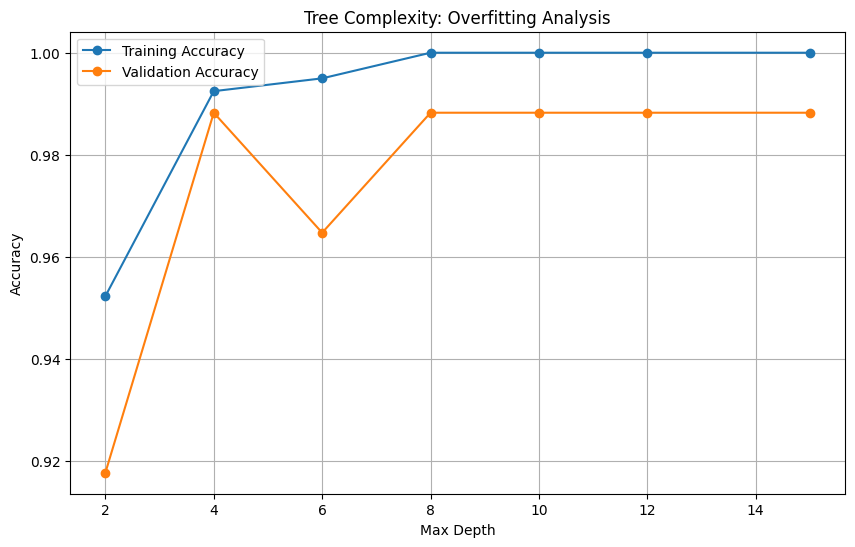

Best Max Depth from validation: 4

Training Final Model with Best Parameters...
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 30
Tree fitting complete.

--- Performance Metrics (Test Set) ---
Accuracy:  0.8837
Precision: 0.8831
Recall:    0.8837
F1-Score:  0.8829


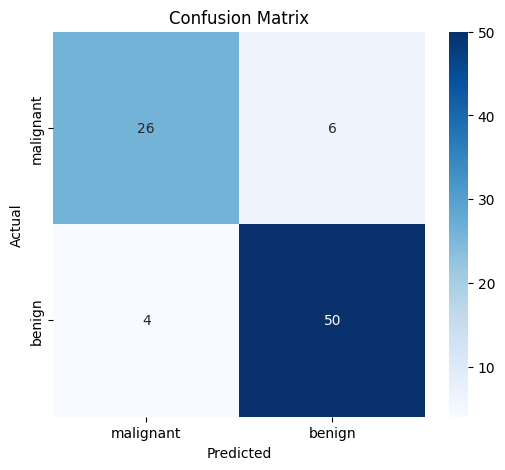


--- Feature Importance ---


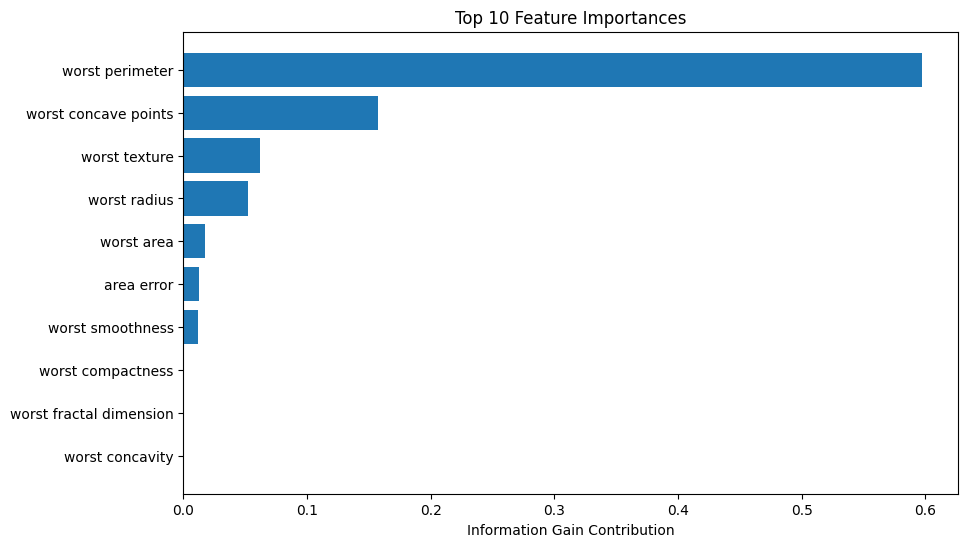

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Hyperparameter Tuning & Overfitting Analysis
max_depths = [2, 4, 6, 8, 10, 12, 15]
train_accs = []
val_accs = []

print("Analyzing Tree Complexity (Depth vs Accuracy)...")
for d in max_depths:
    clf = DecisionTree(max_depth=d, min_samples_split=2,random_state=42)
    clf.fit(X_train, Y_train)
    
    train_pred = clf.predict(X_train)
    val_pred = clf.predict(X_val)
    
    train_accs.append(accuracy_score(Y_train, train_pred))
    val_accs.append(accuracy_score(Y_val, val_pred))

# Plot Overfitting Analysis
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accs, label='Training Accuracy', marker='o')
plt.plot(max_depths, val_accs, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Tree Complexity: Overfitting Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Select best depth based on validation
best_depth_idx = np.argmax(val_accs)
best_depth = max_depths[best_depth_idx]
print(f"Best Max Depth from validation: {best_depth}")

# 2. Final Model Training
print("\nTraining Final Model with Best Parameters...")
# Combine Train + Val for final training
X_train_final = np.concatenate((X_train, X_val), axis=0)
Y_train_final = np.concatenate((Y_train, Y_val), axis=0)

final_clf = DecisionTree(max_depth=best_depth, min_samples_split=2,random_state=42)
final_clf.fit(X_train_final, Y_train_final)

# 3. Performance Metrics on Test Set
y_pred_test = final_clf.predict(X_test)

print("\n--- Performance Metrics (Test Set) ---")
print(f"Accuracy:  {accuracy_score(Y_test, y_pred_test):.4f}")
print(f"Precision: {precision_score(Y_test, y_pred_test, average='weighted'):.4f}")
print(f"Recall:    {recall_score(Y_test, y_pred_test, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(Y_test, y_pred_test, average='weighted'):.4f}")

# 4. Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Feature Importance
print("\n--- Feature Importance ---")
importances = final_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = cancer_data.feature_names

# Plot top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(top_n), importances[indices][:top_n], align="center")
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
plt.gca().invert_yaxis()
plt.xlabel("Information Gain Contribution")
plt.show()

# Bonus

In [12]:
randomForest_tree=RandomForest(n_trees=5, max_depth=4, min_samples_split=2)
randomForest_tree.fit(X_train, Y_train)
predicitons=randomForest_tree.predict(X_val)
print("Random Forest Validation Accuracy:", accuracy(Y_val, predicitons))

Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Fitting tree with X shape: (398, 30), y shape: (398,), n_features: 30
Tree fitting complete.
Random Forest Validation Accuracy: 0.9647058823529412


# D3. Hyperparameter Tuning and Evaluation for Random Forest

Starting Random Forest Grid Search...
Fixed params: max_depth=4, min_samples_split=2
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 5
Tree fitting complete.
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 5
Tree fitting complete.
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 5
Tree fitting complete.
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 5
Tree fitting complete.
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 5
Tree fitting complete.
Trees: 5, Max Features: 5, Val Acc: 1.0000
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 15
Tree fitting complete.
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 15
Tree fitting complete.
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 15
Tree fitting complete.
Fitting tree with X shape: (483, 30), y shape: (483,), n_features: 15
Tree fitting complete.
Fitting tree with X shape: (483, 30), y 

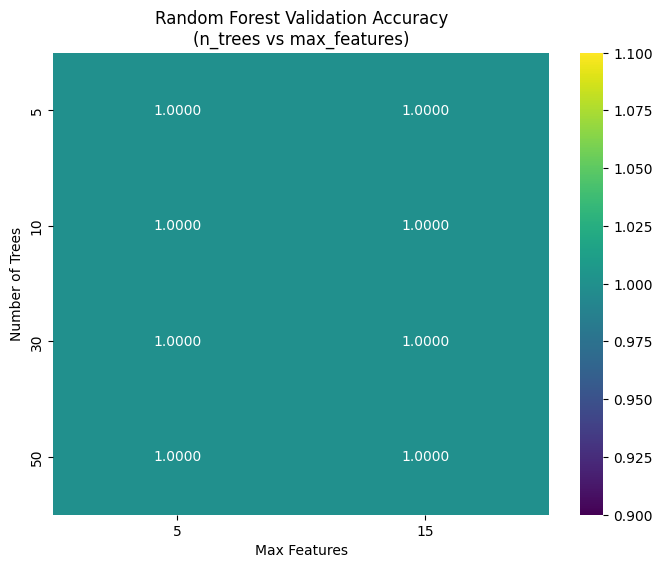

In [13]:


rf_max_depth = best_depth 
rf_min_samples_split = 2 


n_trees_list = [5, 10, 30, 50]
d = X_train.shape[1]
max_features_list = [int(np.sqrt(d)), int(d/2)]

best_rf_acc = -1
best_rf_params = None
rf_results = []

print(f"Starting Random Forest Grid Search...")
print(f"Fixed params: max_depth={rf_max_depth}, min_samples_split={rf_min_samples_split}")

for n_trees in n_trees_list:
    for max_features in max_features_list:
        
        rf = RandomForest(n_trees=n_trees, max_depth=rf_max_depth, min_samples_split=rf_min_samples_split, n_features=max_features)
        
        rf.fit(X_train_final, Y_train_final)
        val_preds = rf.predict(X_val)
        acc = accuracy(Y_val, val_preds)
        
        rf_results.append((n_trees, max_features, acc))
        print(f"Trees: {n_trees}, Max Features: {max_features}, Val Acc: {acc:.4f}")
        
        if acc > best_rf_acc:
            best_rf_acc = acc
            best_rf_params = (n_trees, max_features)

print(f"\nBest RF Validation Accuracy: {best_rf_acc:.4f}")
print(f"Best RF Parameters: n_trees={best_rf_params[0]}, max_features={best_rf_params[1]}")


print("\nRetraining Random Forest on Train + Validation...")

best_rf = RandomForest(
    n_trees=best_rf_params[0], 
    max_depth=rf_max_depth, 
    min_samples_split=rf_min_samples_split, 
    n_features=best_rf_params[1]
)
best_rf.fit(X_train_final, Y_train_final)

# Evaluate on Test set
rf_test_preds = best_rf.predict(X_test)
rf_test_acc = accuracy(Y_test, rf_test_preds)

print(f"\n--- Random Forest Test Set Performance ---")
print(f"Accuracy: {rf_test_acc:.4f}")
print(f"Precision: {precision_score(Y_test, rf_test_preds, average='weighted'):.4f}")
print(f"Recall:    {recall_score(Y_test, rf_test_preds, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(Y_test, rf_test_preds, average='weighted'):.4f}")

# Comparison with Single Decision Tree
print(f"\n--- Comparison ---")
print(f"Single Decision Tree Test Accuracy: {accuracy_score(Y_test, y_pred_test):.4f}")
print(f"Random Forest Test Accuracy:        {rf_test_acc:.4f}")

# Plotting Random Forest Hyperparameter Tuning Results
print("\nPlotting Hyperparameter Tuning Results...")
results_df = pd.DataFrame(rf_results, columns=['n_trees', 'max_features', 'accuracy'])
pivot_table = results_df.pivot(index='n_trees', columns='max_features', values='accuracy')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='viridis')
plt.title('Random Forest Validation Accuracy\n(n_trees vs max_features)')
plt.xlabel('Max Features')
plt.ylabel('Number of Trees')
plt.show()

### discuss the effect on bias and variance.

In [19]:
# Using a single decision tree resulted in a high-variance model with relatively low bias,
# which explains why its test accuracy (0.9651) was slightly lower than the Random Forest.
# By combining multiple trees in a Random Forest, each trained on different bootstrap samples
# and subsets of features, we reduced variance through averaging while maintaining low bias.
# This ensemble effect led to improved generalization and a higher test accuracy (0.9767),
# demonstrating the classic bias-variance tradeoff: the Random Forest preserves the low bias
# of individual trees but significantly decreases variance, resulting in a more robust model.
